In [59]:
import pandas as pd
import glob
import numpy as np
# 读取Excel文件
path = "/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/cos/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/cos/roleplay_refuse_answer/mistral/classify/['answer', 'out_series']"
all_predictions = {}
all_predictions_var = {}
if "qwen" in path:
    layers = 28
else:
    layers = 32
for i in range(0,layers):
    # all_predictions[i] = []
    averages = []
    for seed in range(42,48):
        data_path = f"{path}/{i}_{seed}.xlsx"
        df = pd.read_excel(data_path)
        avgs = list(df.iloc[-1][2:])
        averages.append(avgs)
    data_array = np.array(averages)
    mean_array = np.mean(data_array, axis=0)
    variance_array = np.var(data_array, axis=0)
    mean_list = mean_array.tolist()
    variance_list = variance_array.tolist()
    all_predictions[i] = mean_list
    all_predictions_var[i] = variance_list
labels = df.columns.tolist()[2:]


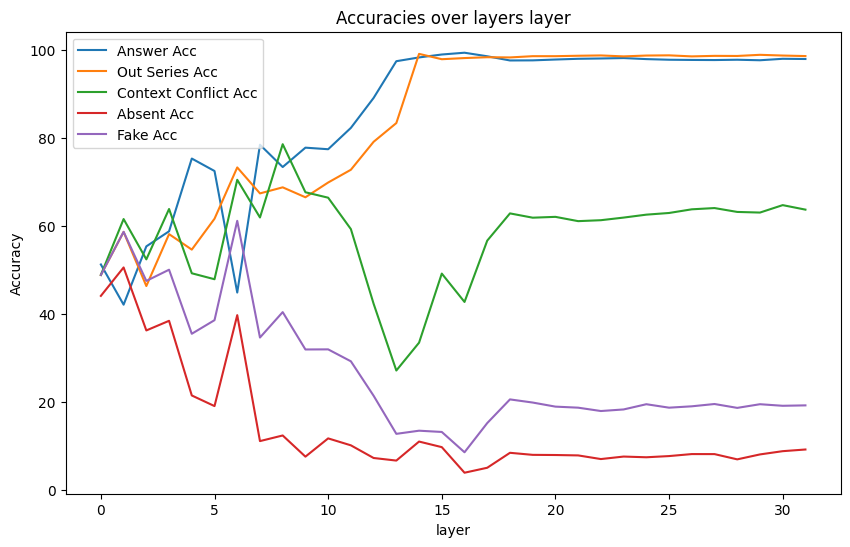

In [60]:
# 准备 x 轴数据
import matplotlib.pyplot as plt
x = list(range(layers))  # 0 到 31

# 准备 y 轴数据
train_acc = [all_predictions[i][0] for i in range(layers)]
validation_acc = [all_predictions[i][1] for i in range(layers)]
answer_acc = [all_predictions[i][2] for i in range(layers)]
out_series_acc = [all_predictions[i][3] for i in range(layers)]
context_conflict_acc = [all_predictions[i][4] for i in range(layers)]
absent_acc = [all_predictions[i][5] for i in range(layers)]
fake_acc = [all_predictions[i][6] for i in range(layers)]

# 创建折线图
plt.figure(figsize=(10, 6))
# plt.plot(x, train_acc, label='Train Acc')
# plt.plot(x, validation_acc, label='Validation Acc')
plt.plot(x, answer_acc, label='Answer Acc')
plt.plot(x, out_series_acc, label='Out Series Acc')
plt.plot(x, context_conflict_acc, label='Context Conflict Acc')
plt.plot(x, absent_acc, label='Absent Acc')
plt.plot(x, fake_acc, label='Fake Acc')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('Accuracies over layers layer')
plt.xlabel('layer')
plt.ylabel('Accuracy')
# plt.legend(loc='upper right')
# 显示图表
plt.show()

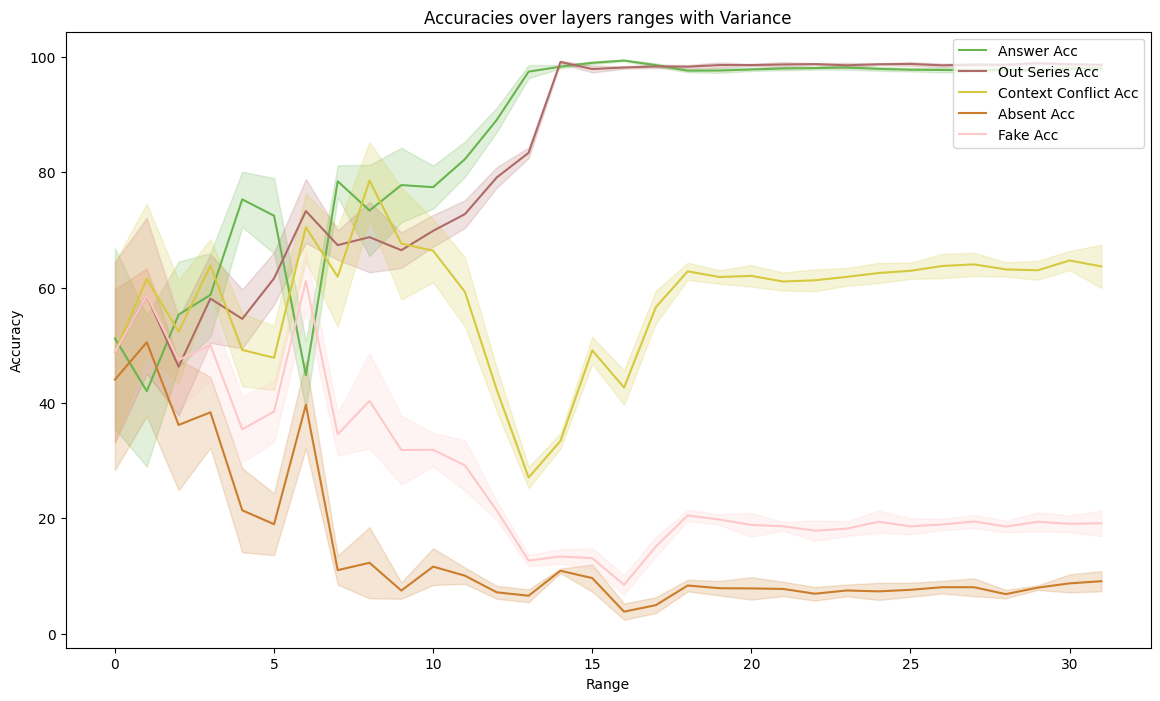

In [65]:
# 准备 x 轴数据
x = list(range(layers))  # 0 到 31

# 准备 y 轴数据及方差
metrics = ['Train Acc', 'Validation Acc', 'Answer Acc', 'Out Series Acc', 'Context Conflict Acc', 'Absent Acc', 'Fake Acc']
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
colors = ['#68B54E', '#ae6a67', '#D6C83F', '#CB7D2C', '#FFC8C8']
plt.figure(figsize=(14, 8))

for i, metric in enumerate(metrics):
    if i <= 1:
        continue
    mean_values = [all_predictions[j][i] for j in range(layers)]
    var_values = [all_predictions_var[j][i] for j in range(layers)]
    std_dev = np.sqrt(var_values)  # 计算标准差

    # 绘制均值折线
    plt.plot(x, mean_values, label=metric,color=colors[i-2])
    
    # 绘制方差区域
    plt.fill_between(x, np.array(mean_values) - std_dev, np.array(mean_values) + std_dev, alpha=0.2,color=colors[i-2])

# 添加图例并调整位置
plt.legend(loc='upper right')
# 添加标题和标签
plt.title('Accuracies over layers ranges with Variance')
plt.xlabel('Range')
plt.ylabel('Accuracy')
# 显示图表
plt.show()

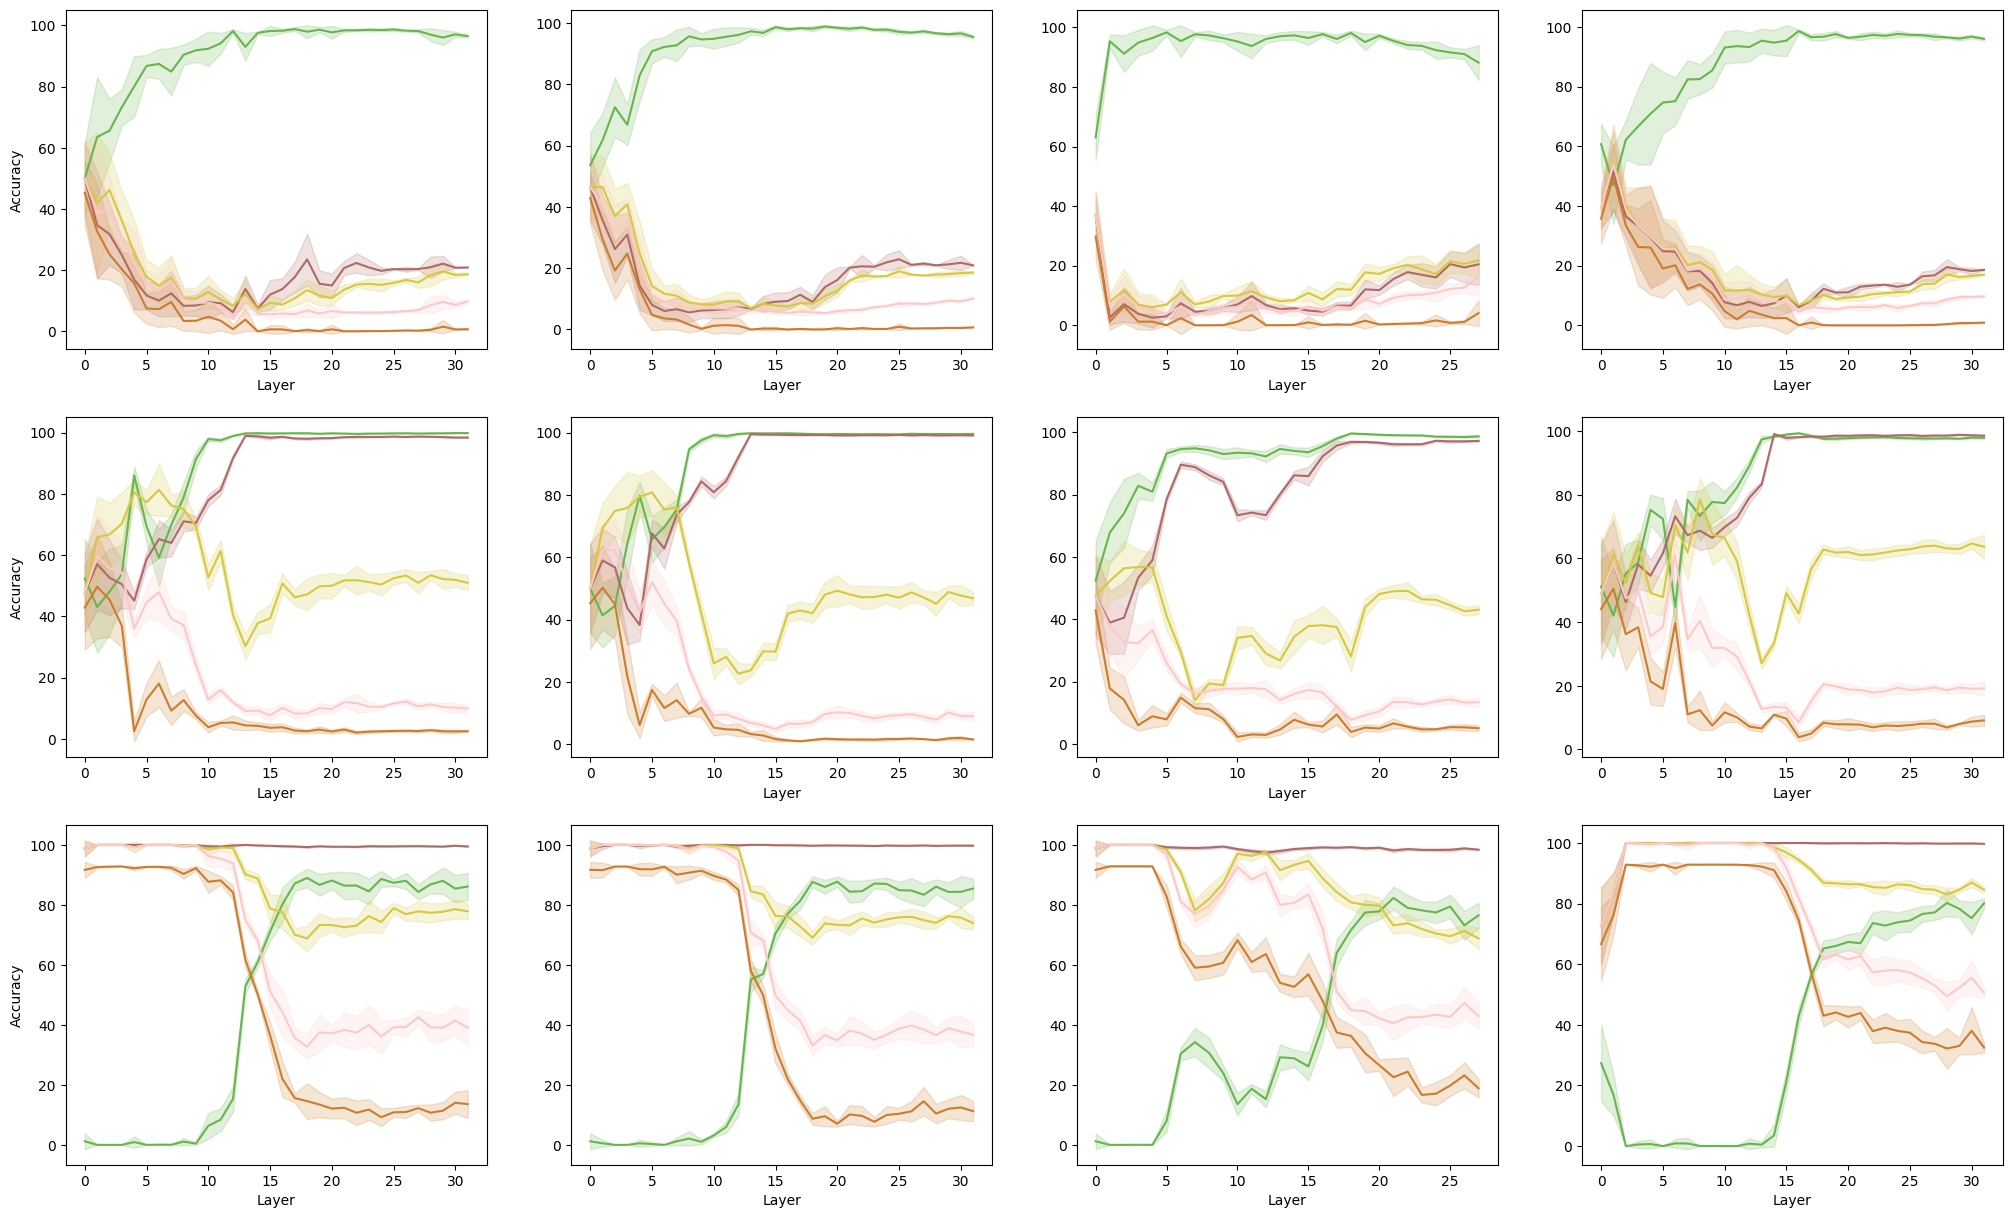

In [6]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
# 读取Excel文件
models = ["llama3","llama3.1","qwen2","mistral"]
data_types = ["['answer', 'fake']",  "['answer', 'out_series']",  "['answer', 'fake', 'out_series']"]
fig, axs = plt.subplots(3, 4, figsize=(25, 15))  # 3行4列的子图布局
axs = axs.flatten()  # 将子图数组展平，方便索引
count = 0

for data_type in data_types:
    for model in models:
        path = f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/cos/{model}/classify/{data_type}"
        all_predictions = {}
        all_predictions_var = {}
        if "qwen" in path:
            layers = 28
        else:
            layers = 32
        for i in range(0,layers):
            # all_predictions[i] = []
            averages = []
            for seed in range(42,48):
                data_path = f"{path}/{i}_{seed}.xlsx"
                df = pd.read_excel(data_path)
                avgs = list(df.iloc[-1][2:])
                averages.append(avgs)
            data_array = np.array(averages)
            mean_array = np.mean(data_array, axis=0)
            variance_array = np.var(data_array, axis=0)
            mean_list = mean_array.tolist()
            variance_list = variance_array.tolist()
            all_predictions[i] = mean_list
            all_predictions_var[i] = variance_list
        labels = df.columns.tolist()[2:]
        # 准备 x 轴数据
        x = list(range(layers))  # 0 到 31

        # 准备 y 轴数据及方差
        metrics = ['Train Acc', 'Validation Acc', 'Answer Acc', 'Out Series Acc', 'Context Conflict Acc', 'Absent Acc', 'Fake Acc']
        # colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        colors = ['#68B54E', '#ae6a67', '#D6C83F', '#CB7D2C', '#FFC8C8']
        # plt.figure(figsize=(14, 8))

        for i, metric in enumerate(metrics):
            if i <= 1:
                continue
            mean_values = [all_predictions[j][i] for j in range(layers)]
            var_values = [all_predictions_var[j][i] for j in range(layers)]
            std_dev = np.sqrt(var_values)  # 计算标准差

            # 绘制均值折线
            axs[count].plot(x, mean_values, label=metric,color=colors[i-2])
            
            # 绘制方差区域
            axs[count].fill_between(x, np.array(mean_values) - std_dev, np.array(mean_values) + std_dev, alpha=0.2,color=colors[i-2])


        # 添加图例和标签
        # axs[count].legend(loc='upper right')
        # axs[count].set_title(metric)
        axs[count].set_xlabel('Layer')
        if model == "llama3":
            axs[count].set_ylabel('Accuracy')

        # 添加图例并调整位置
        # plt.legend(loc='upper right')
        # 添加标题和标签
        # plt.title('Accuracies over layers ranges with Variance')
        
        # plt.xlabel('Layer')
        # if model == "llama3":
            # plt.ylabel('Accuracy')
        # 显示图表
        # plt.savefig(f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/picture/classify/{model}_{data_type}.png")
        # plt.show()
        count += 1
plt.show()


In [19]:
colors[i-2]

IndexError: list index out of range

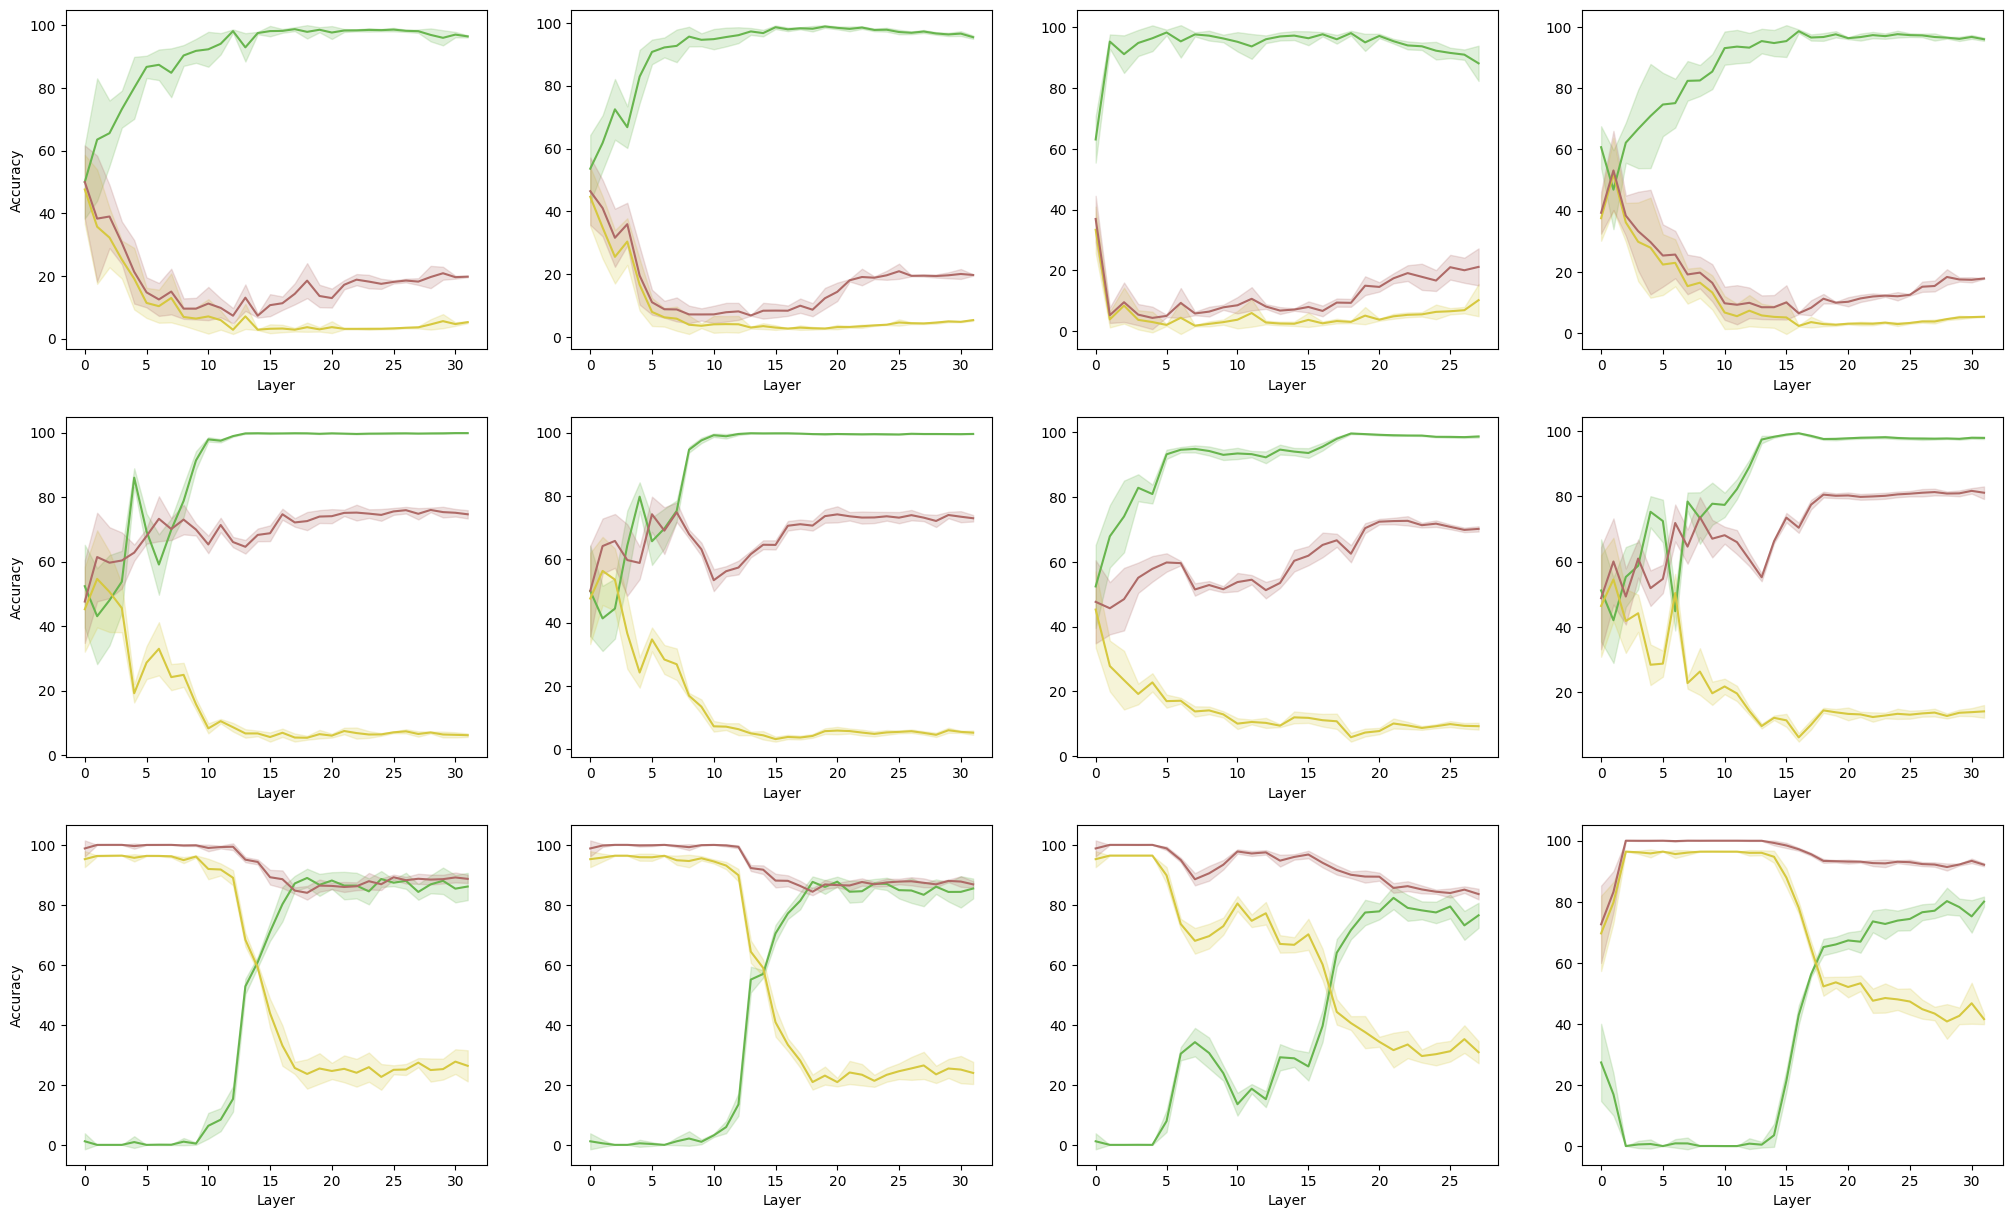

In [22]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
# 读取Excel文件
models = ["llama3","llama3.1","qwen2","mistral"]
data_types = ["['answer', 'fake']",  "['answer', 'out_series']",  "['answer', 'fake', 'out_series']"]
# data_types = ["['answer', 'fake', 'out_series']"]
fig, axs = plt.subplots(3, 4, figsize=(25, 15))  # 3行4列的子图布局
axs = axs.flatten()  # 将子图数组展平，方便索引
count = 0

for data_type in data_types:
    for model in models:
        path = f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/cos/{model}/classify/{data_type}"
        all_predictions = {}
        all_predictions_var = {}
        if "qwen" in path:
            layers = 28
        else:
            layers = 32
        for i in range(0,layers):
            # all_predictions[i] = []
            averages = []
            for seed in range(42,48):
                data_path = f"{path}/{i}_{seed}.xlsx"
                df = pd.read_excel(data_path)
                avgs = list(df.iloc[-1][2:])
                avgs += [avgs[2],(avgs[6] + avgs[5]) / 2, (avgs[3] + avgs[4]) / 2]
                averages.append(avgs)
            data_array = np.array(averages)
            mean_array = np.mean(data_array, axis=0)
            variance_array = np.var(data_array, axis=0)
            mean_list = mean_array.tolist()
            variance_list = variance_array.tolist()
            all_predictions[i] = mean_list
            all_predictions_var[i] = variance_list
        labels = df.columns.tolist()[2:] + ["non-conflict","paramteric","contextual"]
        # 准备 x 轴数据
        x = list(range(layers))  # 0 到 31

        # 准备 y 轴数据及方差
        metrics = ['Train Acc', 'Validation Acc', 'Answer Acc', 'Out Series Acc', 'Context Conflict Acc', 'Absent Acc', 'Fake Acc',"non-conflict","paramteric","contextual"]
        # colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        colors = ['#68B54E', '#D6C83F', '#ae6a67', '#CB7D2C', '#FFC8C8']
        # plt.figure(figsize=(14, 8))

        for i, metric in enumerate(metrics):
            if i <= 6:
                continue
            mean_values = [all_predictions[j][i] for j in range(layers)]
            var_values = [all_predictions_var[j][i] for j in range(layers)]
            std_dev = np.sqrt(var_values)  # 计算标准差

            # 绘制均值折线
            axs[count].plot(x, mean_values, label=metric,color=colors[i-7])
            
            # 绘制方差区域
            axs[count].fill_between(x, np.array(mean_values) - std_dev, np.array(mean_values) + std_dev, alpha=0.2,color=colors[i-7])


        # 添加图例和标签
        # axs[count].legend(loc='upper right')
        # axs[count].set_title(metric)
        axs[count].set_xlabel('Layer')
        if model == "llama3":
            axs[count].set_ylabel('Accuracy')

        # 添加图例并调整位置
        # plt.legend(loc='upper right')
        # 添加标题和标签
        # plt.title('Accuracies over layers ranges with Variance')
        
        # plt.xlabel('Layer')
        # if model == "llama3":
            # plt.ylabel('Accuracy')
        # 显示图表
        # plt.savefig(f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/picture/classify/{model}_{data_type}.png")
        # plt.show()
        count += 1
plt.show()


# 柱状图

In [10]:
import pandas as pd
import glob
import numpy as np
# 读取Excel文件
# path = "/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/repe/llama3-instruct/classify/['answer', 'fake', 'out_series']"
# path = "/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/ft/mistral-instruct/classify/['answer', 'fake', 'out_series']"
path_template = "/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{train_type}/{model_name}/classify/['answer', 'fake', 'out_series']"

train_types = ["ft","lora","repe"]
model_names = ["llama3-instruct","llama3.1-instruct","qwen2","mistral-instruct"]
dataset = {}


i=1
for model_name in model_names:
    all_predictions = {}
    all_predictions_var = {}
    for train_type in train_types:
        
        path = path_template.format(train_type=train_type,model_name=model_name)
        if "qwen" in path:
            layers = 28-1
        else:
            layers = 32-1
        # all_predictions[i] = []
        averages = []
        for seed in range(42,46):
            data_path = f"{path}/{layers}_{seed}.xlsx"
            df = pd.read_excel(data_path)
            
            # 获取所有列名
            cols = list(df.columns)

            # 交换第三列和第四列
            cols[5], cols[6] = cols[6], cols[5]

            # 重新排列 DataFrame 的列
            df = df[cols]
            
            avgs = list(df.iloc[-1][2:])
            averages.append(avgs)
        data_array = np.array(averages)
        mean_array = np.mean(data_array, axis=0)
        variance_array = np.var(data_array, axis=0)
        mean_list = mean_array.tolist()
        variance_list = variance_array.tolist()
        all_predictions[train_type] = mean_list
        all_predictions_var[train_type] = variance_list
    dataset[i] = all_predictions
    i += 1
    labels = df.columns.tolist()[2:]


In [11]:
df.columns.tolist()

['role',
 'layer',
 'train_acc',
 'validation_acc',
 'answer_acc',
 'context_conflict_acc',
 'out_series_acc',
 'absent_acc',
 'fake_acc']

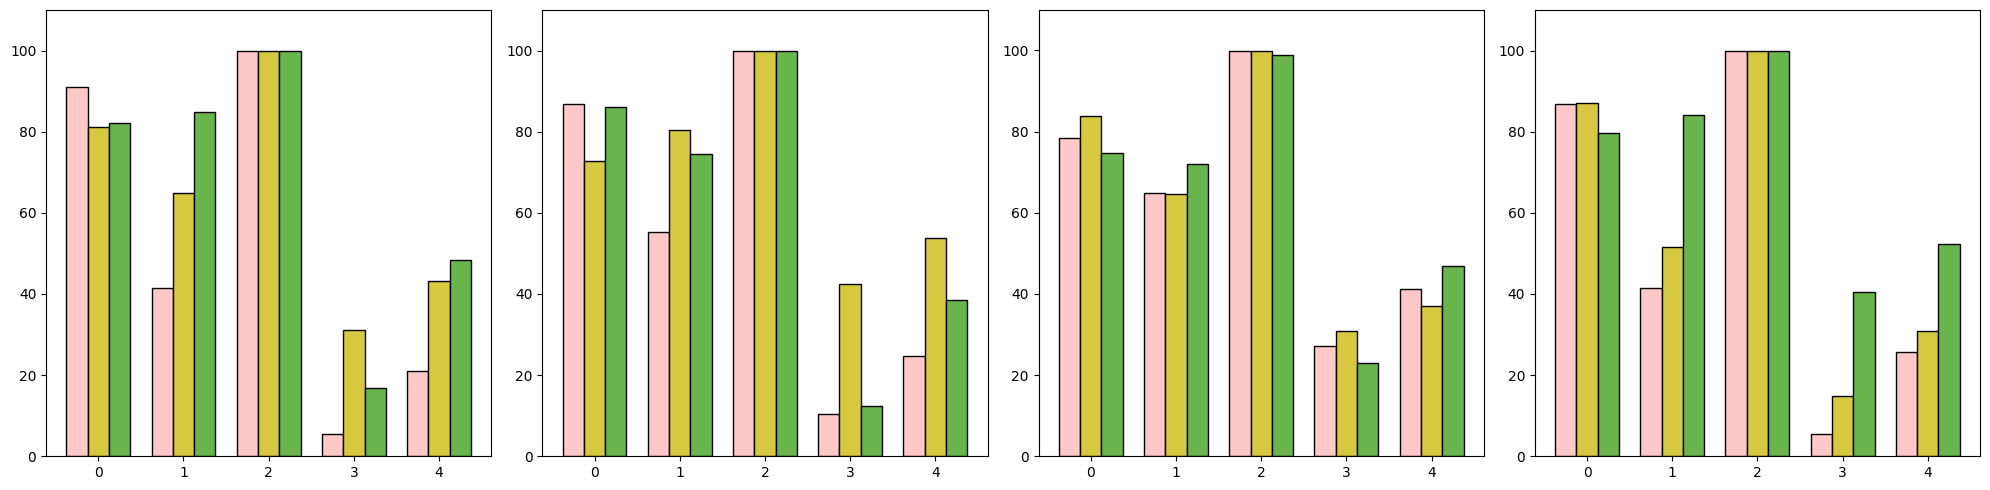

In [13]:
import pandas as pd
import glob
import numpy as np
# 读取Excel文件
# path = "/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/repe/llama3-instruct/classify/['answer', 'fake', 'out_series']"
# path = "/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/ft/mistral-instruct/classify/['answer', 'fake', 'out_series']"
path_template = "/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{train_type}/mistral-instruct/classify/['answer', 'fake', 'out_series']"

train_types = ["prompt","ft","lora","repe"]

all_predictions = {}
all_predictions_var = {}
if "qwen" in path:
    layers = 28-1
else:
    layers = 32-1
for train_type in train_types:
    path = path_template.format(train_type=train_type)
    # all_predictions[i] = []
    averages = []
    for seed in range(42,46):
        data_path = f"{path}/{layers}_{seed}.xlsx"
        df = pd.read_excel(data_path)
        avgs = list(df.iloc[-1][2:])
        averages.append(avgs)
    data_array = np.array(averages)
    mean_array = np.mean(data_array, axis=0)
    variance_array = np.var(data_array, axis=0)
    mean_list = mean_array.tolist()
    variance_list = variance_array.tolist()
    all_predictions[train_type] = mean_list
    all_predictions_var[train_type] = variance_list
labels = df.columns.tolist()[2:]

import matplotlib.pyplot as plt
import numpy as np

# 假设的数据集
labels = ['train_acc', 'validation_acc', 'Non-Conflict', 'Role Setting', 'Role Description', 'Fact Knowledge', 'Spatial Knowledge']
selected_labels = labels[2:]

# 创建图形和轴
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1行4列的子图

# 绘制每个子图
for idx, (key, data) in enumerate(dataset.items()):
    ax = axes[idx]
    
    # 提取所需数据（去掉 prompt）
    ft = data['ft'][2:]
    lora = data['lora'][2:]
    repe = data['repe'][2:]

    # 设置柱状图参数
    x = np.arange(len(selected_labels))
    width = 0.25  # 根据柱子的数量调整宽度

    # 绘制柱子并设置颜色和误差条
    rects1 = ax.bar(x - width, ft, width, label='FT', color=colors[4], edgecolor='black', capsize=5)
    rects2 = ax.bar(x, lora, width, label='LoRA', color=colors[2], edgecolor='black', capsize=5)
    rects3 = ax.bar(x + width, repe, width, label='Representation Editing', edgecolor='black', color=colors[0], capsize=5)

    # 添加一些文本标签
    # ax.set_ylabel('Scores')
    # ax.set_title(f'Dataset {key}')
    # ax.set_xticks(x)
    # ax.set_xticklabels(selected_labels)
    # if idx == 3:
    #     ax.legend()
    ax.set_ylim(0, max(max(ft), max(lora), max(repe)) * 1.1)
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 5),
                            textcoords='offset points',
                            ha='center', va='bottom',fontsize=8,fontweight='bold',
                            rotation=30)  # 旋转45度

    # autolabel(rects1)
    # autolabel(rects2)
    # autolabel(rects3)

fig.tight_layout()
plt.show()

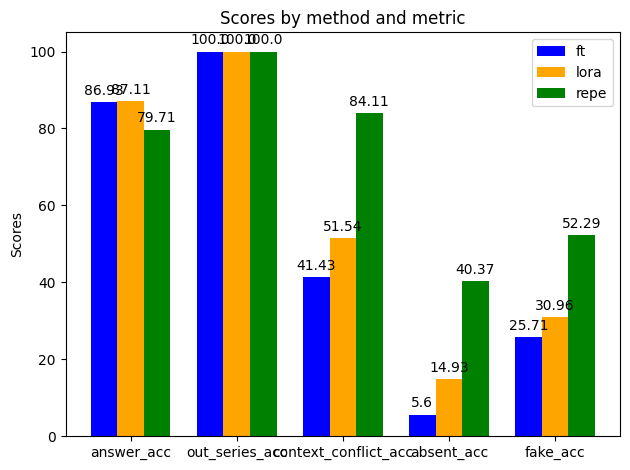

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
# data = {
#     'prompt': [85.39083660683872, 76.57142857142856, 79.46428571428572, 99.71428571428571, 84.28571428571429, 32.82091592617909, 50.53571428571428],
#     'ft': [92.46449693016052, 70.88095238095238, 86.92857142857143, 100.0, 41.42857142857143, 5.595522898154477, 25.714285714285715],
#     'lora': [89.08262589080334, 72.69047619047619, 87.10714285714286, 100.0, 51.53571428571428, 14.932330827067668, 30.96428571428571],
#     'repe': [82.86877048380593, 77.33333333333333, 79.71428571428571, 100.0, 84.10714285714286, 40.372180451127825, 52.285714285714285],
# }
data=all_predictions
variances= all_predictions_var
labels = ['train_acc', 'validation_acc', 'answer_acc', 'out_series_acc', 'context_conflict_acc', 'absent_acc', 'fake_acc']
selected_labels = labels[2:]

# 提取所需数据（去掉 prompt）
ft = data['ft'][2:]
lora = data['lora'][2:]
repe = data['repe'][2:]

# 设置柱状图参数
x = np.arange(len(selected_labels))
width = 0.25  # 根据柱子的数量调整宽度

# 创建图形和轴
fig, ax = plt.subplots()

# 绘制柱子并设置颜色
rects1 = ax.bar(x - width, ft, width, label='ft', color='blue')
rects2 = ax.bar(x, lora, width, label='lora', color='orange')
rects3 = ax.bar(x + width, repe, width, label='repe', color='green')

# 添加一些文本标签
ax.set_ylabel('Scores')
ax.set_title('Scores by method and metric')
ax.set_xticks(x)
ax.set_xticklabels(selected_labels)
ax.legend()

# 自动标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

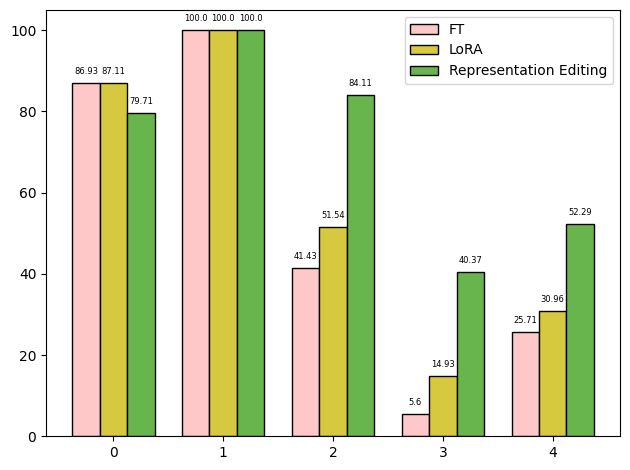

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data=all_predictions
variances= all_predictions_var
colors = ['#68B54E', '#ae6a67', '#D6C83F', '#CB7D2C', '#FFC8C8']
labels = ['train_acc', 'validation_acc', 'answer_acc', 'out_series_acc', 'context_conflict_acc', 'absent_acc', 'fake_acc']
selected_labels = labels[2:]

# 提取所需数据（去掉 prompt）
ft = data['ft'][2:]
lora = data['lora'][2:]
repe = data['repe'][2:]


# 取后五项
ft_var = variances['ft'][2:]
lora_var = variances['lora'][2:]
repe_var = variances['repe'][2:]

# 设置柱状图参数
x = np.arange(len(selected_labels))
width = 0.25  # 根据柱子的数量调整宽度

# 创建图形和轴
fig, ax = plt.subplots()

# 绘制柱子并设置颜色和误差条
# rects1 = ax.bar(x - width, ft, width, label='ft', color=colors[4], yerr=ft_var, capsize=5)
# rects2 = ax.bar(x, lora, width, label='lora', color=colors[2], yerr=lora_var, capsize=5)
# rects3 = ax.bar(x + width, repe, width, label='repe', color=colors[0], yerr=repe_var, capsize=5)
rects1 = ax.bar(x - width, ft, width, label='FT', color=colors[4], edgecolor='black', capsize=5)
rects2 = ax.bar(x, lora, width, label='LoRA', color=colors[2], edgecolor='black', capsize=5)
rects3 = ax.bar(x + width, repe, width, label='Representation Editing', edgecolor='black', color=colors[0], capsize=5)
# 添加一些文本标签
# ax.set_ylabel('Acc')
# ax.set_title('Scores by method and metric')
# ax.set_xticks(x)
# ax.set_xticklabels(selected_labels)
ax.legend()

# 自动标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',fontsize=6
                        )  # 旋转45度

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

NameError: name 'colors' is not defined

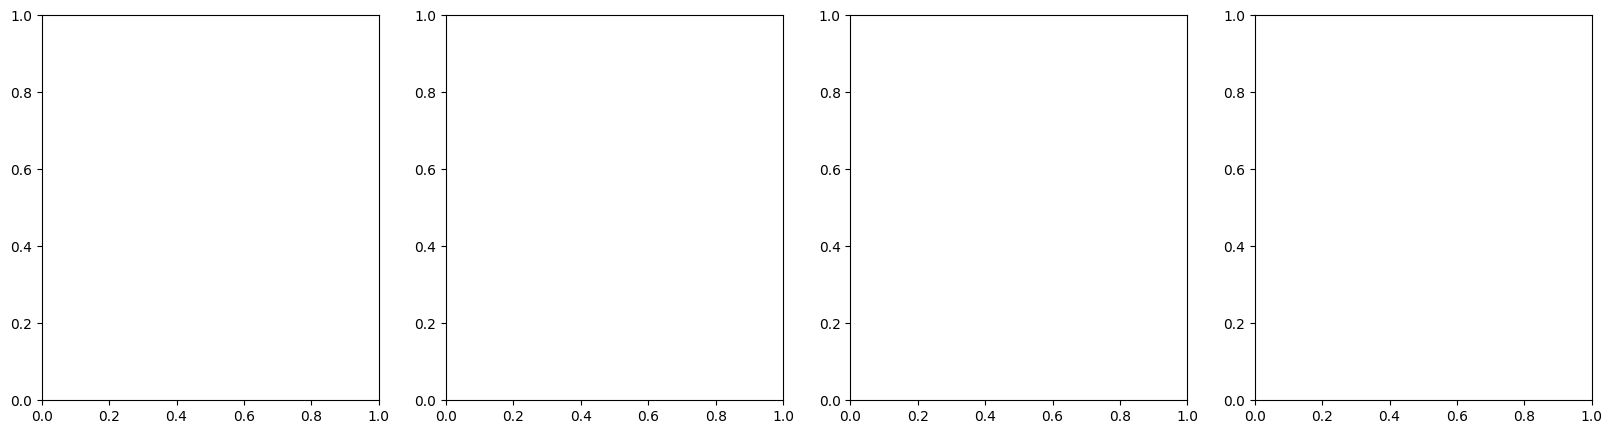

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的数据集
dataset = {
    1: {'prompt': [85.4, 76.6, 79.5, 99.7, 84.3, 32.8, 50.5], 'ft': [92.5, 70.9, 86.9, 100.0, 41.4, 5.6, 25.7], 'lora': [89.1, 72.7, 87.1, 100.0, 51.5, 14.9, 31.0], 'repe': [82.9, 77.3, 79.7, 100.0, 84.1, 40.4, 52.3]},
    2: {'prompt': [90.1, 80.2, 82.3, 95.4, 88.5, 34.6, 51.7], 'ft': [93.6, 75.7, 88.8, 97.9, 45.0, 6.4, 27.9], 'lora': [91.2, 76.3, 89.9, 98.8, 55.3, 16.1, 32.5], 'repe': [84.1, 79.3, 81.5, 98.7, 87.2, 42.5, 54.0]},
    3: {'prompt': [88.7, 78.4, 81.2, 97.3, 86.2, 33.7, 50.9], 'ft': [92.1, 72.8, 87.5, 99.5, 42.3, 5.9, 26.3], 'lora': [89.8, 74.2, 88.1, 99.6, 53.0, 15.2, 31.6], 'repe': [83.4, 78.0, 80.6, 99.4, 85.8, 41.1, 53.1]},
    4: {'prompt': [87.9, 77.1, 80.4, 96.8, 85.7, 33.3, 50.2], 'ft': [91.7, 71.9, 86.6, 98.6, 41.8, 5.7, 25.9], 'lora': [89.3, 73.1, 87.4, 99.1, 52.5, 14.7, 31.2], 'repe': [82.7, 77.4, 79.9, 99.0, 84.5, 40.5, 52.6]}
}

labels = ['train_acc', 'validation_acc', 'answer_acc', 'out_series_acc', 'context_conflict_acc', 'absent_acc', 'fake_acc']
selected_labels = labels[2:]

# 创建图形和轴
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1行4列的子图

# 绘制每个子图
for idx, (key, data) in enumerate(dataset.items()):
    ax = axes[idx]
    
    # 提取所需数据（去掉 prompt）
    ft = data['ft'][2:]
    lora = data['lora'][2:]
    repe = data['repe'][2:]

    # 设置柱状图参数
    x = np.arange(len(selected_labels))
    width = 0.25  # 根据柱子的数量调整宽度

    # 绘制柱子并设置颜色和误差条
    rects1 = ax.bar(x - width, ft, width, label='FT', color=colors[4], edgecolor='black', capsize=5)
    rects2 = ax.bar(x, lora, width, label='LoRA', color=colors[2], edgecolor='black', capsize=5)
    rects3 = ax.bar(x + width, repe, width, label='Representation Editing', edgecolor='black', color=colors[0], capsize=5)

    # 添加一些文本标签
    # ax.set_ylabel('Scores')
    # ax.set_title(f'Dataset {key}')
    # ax.set_xticks(x)
    # ax.set_xticklabels(selected_labels)
    # if idx == 3:
    #     ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 5),
                            textcoords='offset points',
                            ha='center', va='bottom',fontsize=5.5
                            )  # 旋转45度

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

fig.tight_layout()
plt.show()